In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from newdust import *
from newdust.halos import *

from scipy.integrate import trapz

In [3]:
NE, NTH = 50, 200
EVALS   = np.logspace(-1, 1, NE)   # keV
THVALS  = np.logspace(-1, 4, NTH)  # arcsec
GPOP    = grainpop.make_MRN_drude(md=1.e-6)['RGD']

In [4]:
uni_halo = Halo(EVALS, THVALS, unit='kev')
scr_halo = Halo(EVALS, THVALS, unit='kev')

In [5]:
%%time
galhalo.uniformISM(uni_halo, GPOP)

CPU times: user 46.3 s, sys: 19.5 s, total: 1min 5s
Wall time: 1min 7s


[]

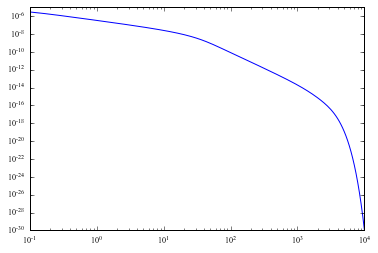

In [6]:
plt.plot(THVALS, uni_halo.norm_int[-1,:])
plt.loglog()

In [7]:
alph_grid = np.repeat(THVALS.reshape(1, NTH), NE, axis=0)
int_halo  = trapz(uni_halo.norm_int * 2.0 * np.pi * alph_grid, THVALS, axis=1)

[]

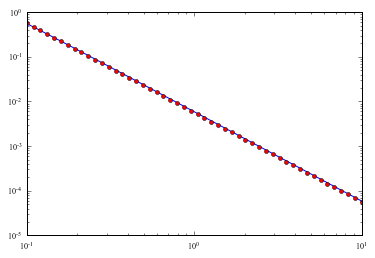

In [8]:
plt.plot(EVALS, int_halo)
plt.plot(EVALS, uni_halo.taux, 'ro')
plt.loglog()

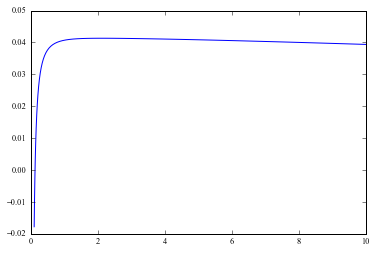

In [9]:
plt.plot(EVALS, int_halo/uni_halo.taux-1.0)

In [10]:
FABS = 1.0 * np.power(EVALS, -2.0) * np.exp(-0.1 * np.power(EVALS, -3.5))

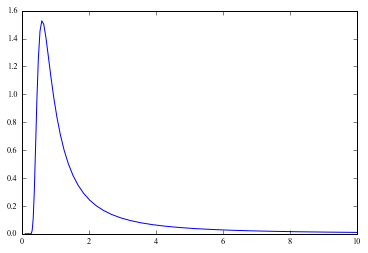

In [11]:
plt.plot(EVALS, FABS)

In [12]:
uni_halo.calculate_intensity(FABS)

[]

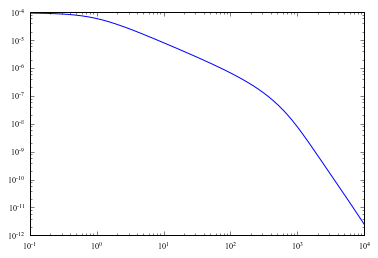

In [13]:
plt.plot(THVALS, uni_halo.intensity)
plt.loglog()

In [14]:
tot_halo = trapz(uni_halo.intensity * 2.0 * np.pi * THVALS, THVALS)

In [15]:
tot_halo

0.23266569089585762

In [16]:
np.sum(uni_halo.fhalo) / tot_halo

0.9534818964425209

In [23]:
t1 = uni_halo[0:5.1]
t2 = uni_halo[5.1:]
i1 = uni_halo.lam[:5.1]
i2 = uni_halo.lam[5.1:]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[]

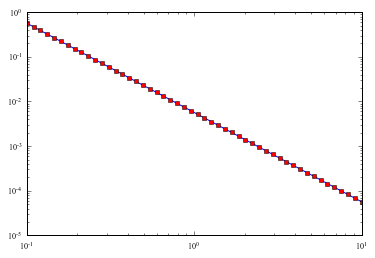

In [24]:
plt.plot(uni_halo.lam, uni_halo.taux, 'b-')
plt.plot(t1.lam, t1.taux, 'rs')
plt.plot(t2.lam, t2.taux, 'rs')
plt.loglog()

[]

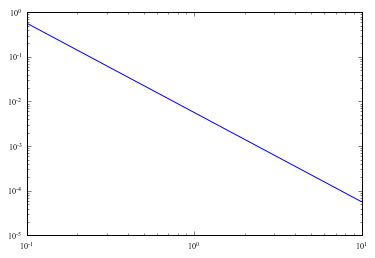

In [27]:
plt.plot(EVALS, np.append(t1.taux, t2.taux))
plt.loglog()